In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand, randint

In [14]:
def simulate_trials(square_side, num_steps):
    # Initialize the starting point
    x, y = square_side, square_side

    # Initialize the number of hits
    hits = 0

    # Initialize the lists to store the points
    x_points = []
    y_points = []

    # Run the simulation for the given number of steps
    for _ in range(num_steps):
        # Generate two random numbers between -1/6th of the side dimension and 1/6 of the side dimension
        deltax = (rand() - 0.5) * square_side / 3
        deltay = (rand() - 0.5) * square_side / 3

        # Calculate the new point
        new_x = x + deltax
        new_y = y + deltay

        # Check if the new point is inside the square
        if 0 <= new_x <= square_side and 0 <= new_y <= square_side:
            # Update the current point
            x, y = new_x, new_y

            # Append the point to the lists
            x_points.append(x)
            y_points.append(y)

            # Check if the new point is inside the circle
            if (x - square_side / 2) ** 2 + (y - square_side / 2) ** 2 <= (square_side / 2) ** 2:
                # Increment the number of hits
                hits += 1

    # Plot the points
    plt.figure(figsize=(6, 6))
    plt.scatter(x_points, y_points, s=1)
    plt.xlim(0, square_side)
    plt.ylim(0, square_side)
    plt.title('Steps inside the square')
    plt.show()

    # Return the number of hits
    return hits

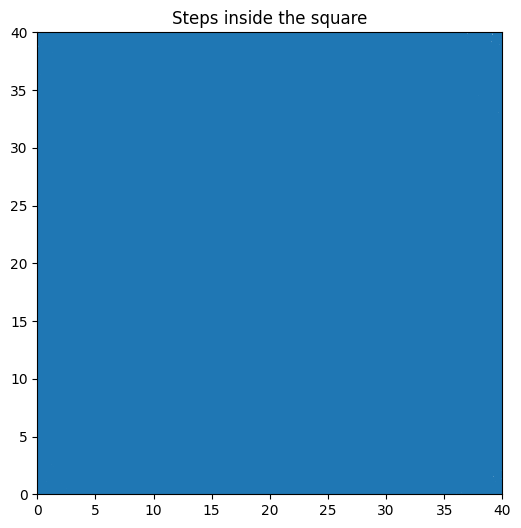

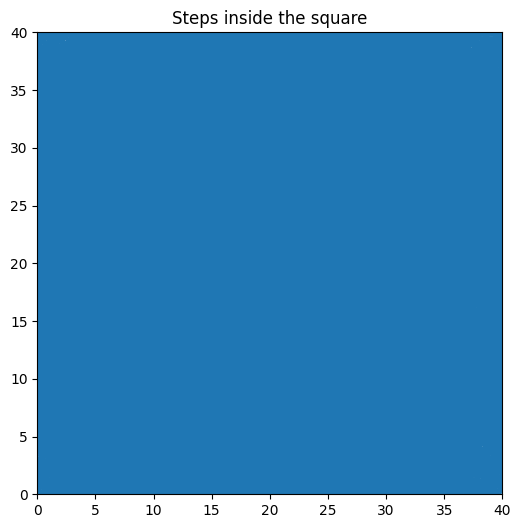

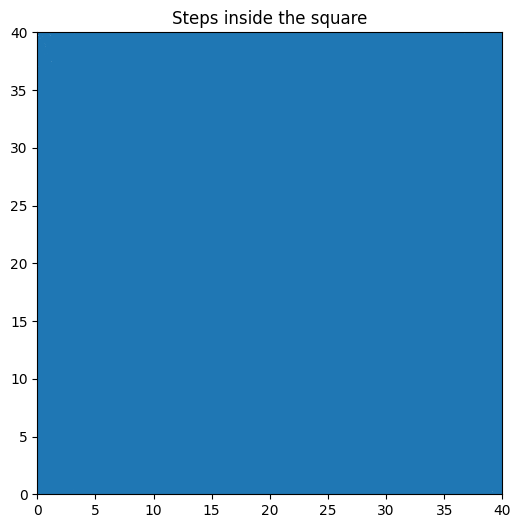

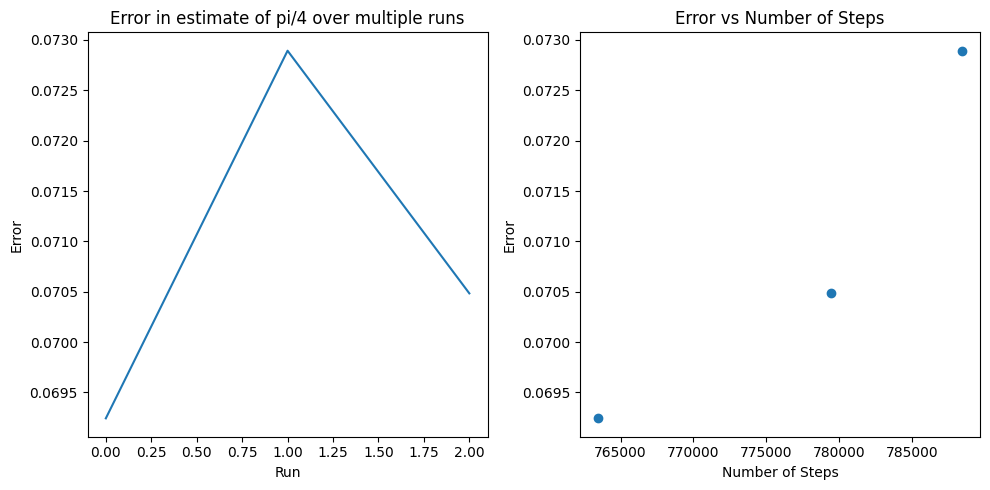

In [15]:
def estimate_pi(num_runs):
    errors = []
    num_steps_list = []

    # Run the simulation for the given number of runs
    for _ in range(num_runs):
        # Generate a random number of steps between 10000 and 1e5
        num_steps = randint(100000, int(1e6))

        # Run the simulation and get the number of hits
        hits = simulate_trials(40, num_steps)

        # Calculate the estimate of pi/4
        estimate_of_piby4 = hits / num_steps

        # Calculate the error
        error = abs(estimate_of_piby4 - np.pi/4)

        # Append the error and the number of steps to the respective lists
        errors.append(error)
        num_steps_list.append(num_steps)

    # Plot the errors
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(errors)
    plt.xlabel('Run')
    plt.ylabel('Error')
    plt.title('Error in estimate of pi/4 over multiple runs')

    plt.subplot(1, 2, 2)
    plt.scatter(num_steps_list, errors)
    plt.xlabel('Number of Steps')
    plt.ylabel('Error')
    plt.title('Error vs Number of Steps')

    plt.tight_layout()
    plt.show()

# Call the estimate_pi function with num_runs = 5
estimate_pi(3)